In [35]:
!pip install pandas

In [36]:
import pandas as pd

#load data
data = pd.read_csv("ADEME-CarLabelling.csv", delimiter=";", decimal=",")

data.head()

,Marque,Libellé modèle,Modèle,Groupe,Description Commerciale,Energie,Carrosserie,Cylindrée,Gamme,Puissance fiscale,...,Essai CO2 type 1,Essai HC,Essai Nox,Essai HCNox,Essai particules,Masse OM Min,Masse OM Max,Bonus-Malus,Barème Bonus-Malus,Prix véhicule
0,RENAULT,KANGOO,KANGOO,RENAULT,KANGOO (130ch),ESSENCE,COMBISPACE,1332,INFERIEURE,7,...,0.234,0.012,0.022,NaN,0.001,1594,1594,Malus,1901.0,31000
1,MAZDA,MX-30,MX-30,AUTRES,MX-30 E-SKYACTIV (145ch),ELECTRIC,TS TERRAINS/CHEMINS,0,INFERIEURE,6,...,NaN,NaN,NaN,NaN,NaN,1720,1720,Bonus 6000,-6000.0,38510
2,DS,DS 7 CROSSBACK,7 CROSSBACK,STELLANTIS,DS7 CROSSBACK e-tense 4x2 (225ch),ELEC+ESSENC HR,TS TERRAINS/CHEMINS,1598,MOYENNE SUPERIEURE,10,...,0.460,0.015,0.016,NaN,0.001,1835,1835,Neutre 0,NaN,57560
3,RENAULT,AUSTRAL,AUSTRAL,RENAULT,AUSTRAL (130ch+0Kw),ESS+ELEC HNR,TS TERRAINS/CHEMINS,1199,MOYENNE SUPERIEURE,7,...,0.439,0.024,0.018,NaN,0.000,1496,1496,Neutre 0,11900.0,33000
4,B.M.W.,SERIE 2,218,AUTRES,218i Active Tourer,ESSENCE,MONOSPACE COMPACT,1499,MOYENNE INFERIEURE,7,...,0.204,0.007,0.009,NaN,0.000,1545,1545,Malus,400.0,36688


In [37]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

Conso elec Min                   6861
Autonomie elec urbain Min        6861
Autonomie elec Min               6861
Autonomie elec urbain Max        6779
Autonomie elec Max               6779
Conso elec Max                   6779
Puissance nominale électrique    4925
Essai HCNox                      4666
Essai HC                         3039
Barème Bonus-Malus               1410
CO2 haute vitesse Min             989
Conso haute vitesse Min           989
CO2 T-haute vitesse Min           989
CO2 moyenne vitesse Min           989
Conso moyenne vitesse Min         989
CO2 basse vitesse Min             989
Conso T-haute vitesse Min         989
Conso basse vitesse Min           989
Conso moyenne vitesse Max         900
Conso haute vitesse Max           900
Conso basse vitesse Max           900
CO2 basse vitesse Max             900
CO2 moyenne vitesse Max           900
CO2 haute vitesse Max             900
Conso T-haute vitesse Max         900
CO2 T-haute vitesse Max           900
Essai partic

In [38]:
#Replace NaN values in "Essai" columns with -1 
essai_columns = [col for col in data.columns if "Essai" in col]
data[essai_columns] = data[essai_columns].fillna(-1)



missing_values = data.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

Autonomie elec Min               6861
Conso elec Min                   6861
Autonomie elec urbain Min        6861
Autonomie elec urbain Max        6779
Autonomie elec Max               6779
Conso elec Max                   6779
Puissance nominale électrique    4925
Barème Bonus-Malus               1410
Conso T-haute vitesse Min         989
Conso moyenne vitesse Min         989
CO2 T-haute vitesse Min           989
CO2 haute vitesse Min             989
CO2 moyenne vitesse Min           989
Conso basse vitesse Min           989
CO2 basse vitesse Min             989
Conso haute vitesse Min           989
Conso moyenne vitesse Max         900
Conso basse vitesse Max           900
Conso T-haute vitesse Max         900
CO2 basse vitesse Max             900
Conso haute vitesse Max           900
CO2 moyenne vitesse Max           900
CO2 haute vitesse Max             900
CO2 T-haute vitesse Max           900
Conso vitesse mixte Min           395
CO2 vitesse mixte Min             395
Conso vitess

In [39]:
# List of columns to replace null values
columns_to_replace = [
    "Autonomie elec Min", 
    "Conso elec Min", 
    "Autonomie elec urbain Min", 
    "Autonomie elec Max", 
    "Conso elec Max", 
    "Puissance nominale électrique"
]

# Replace null values with -1
for column in columns_to_replace:
    data[column].fillna(-1, inplace=True)

data.head()
missing_values = data.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

Autonomie elec urbain Max    6779
Barème Bonus-Malus           1410
CO2 basse vitesse Min         989
CO2 moyenne vitesse Min       989
Conso haute vitesse Min       989
CO2 T-haute vitesse Min       989
Conso T-haute vitesse Min     989
CO2 haute vitesse Min         989
Conso basse vitesse Min       989
Conso moyenne vitesse Min     989
CO2 T-haute vitesse Max       900
CO2 haute vitesse Max         900
CO2 moyenne vitesse Max       900
Conso basse vitesse Max       900
CO2 basse vitesse Max         900
Conso T-haute vitesse Max     900
Conso haute vitesse Max       900
Conso moyenne vitesse Max     900
Conso vitesse mixte Min       395
CO2 vitesse mixte Min         395
Conso vitesse mixte Max       270
CO2 vitesse mixte Max         270
Puissance maximale            269
dtype: int64

In [40]:
data.drop("Autonomie elec urbain Max", axis=1, inplace=True)

In [45]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

Barème Bonus-Malus    933
dtype: int64

In [41]:
columns_pairs_to_merge = [
    ("Conso basse vitesse Min", "Conso basse vitesse Max"),
    ("Conso moyenne vitesse Min", "Conso moyenne vitesse Max"),
    ("Conso haute vitesse Min", "Conso haute vitesse Max"),
    ("Conso T-haute vitesse Min", "Conso T-haute vitesse Max"),
    ("Conso vitesse mixte Min", "Conso vitesse mixte Max"),
    ("Conso elec Min", "Conso elec Max"),
    ("CO2 basse vitesse Min", "CO2 basse vitesse Max"),
    ("CO2 moyenne vitesse Min", "CO2 moyenne vitesse Max"),
    ("CO2 haute vitesse Min", "CO2 haute vitesse Max"),
    ("CO2 T-haute vitesse Min", "CO2 T-haute vitesse Max"),
    ("CO2 vitesse mixte Min", "CO2 vitesse mixte Max")
]

for min_col, max_col in columns_pairs_to_merge:
    data.drop(data[data[min_col].isnull() | data[max_col].isnull()].index, inplace=True)

data.reset_index(drop=True, inplace=True)



In [42]:
for min_col, max_col in columns_pairs_to_merge:
    if min_col in data.columns and max_col in data.columns:
        avg_column = min_col.replace(" Min", " Avg")
        data[avg_column] = (data[min_col] + data[max_col]) / 2

# Drop the min and max columns if they exist
for min_col, max_col in columns_pairs_to_merge:
    if min_col in data.columns:
        data.drop(min_col, axis=1, inplace=True)
    if max_col in data.columns:
        data.drop(max_col, axis=1, inplace=True)

data.head()

,Marque,Libellé modèle,Modèle,Groupe,Description Commerciale,Energie,Carrosserie,Cylindrée,Gamme,Puissance fiscale,...,Conso moyenne vitesse Avg,Conso haute vitesse Avg,Conso T-haute vitesse Avg,Conso vitesse mixte Avg,Conso elec Avg,CO2 basse vitesse Avg,CO2 moyenne vitesse Avg,CO2 haute vitesse Avg,CO2 T-haute vitesse Avg,CO2 vitesse mixte Avg
0,RENAULT,KANGOO,KANGOO,RENAULT,KANGOO (130ch),ESSENCE,COMBISPACE,1332,INFERIEURE,7,...,6.7880,6.188,7.9175,7.2635,-1.0,198.195,153.835,140.195,179.495,164.64
1,RENAULT,AUSTRAL,AUSTRAL,RENAULT,AUSTRAL (130ch+0Kw),ESS+ELEC HNR,TS TERRAINS/CHEMINS,1199,MOYENNE SUPERIEURE,7,...,5.0200,4.834,5.9555,5.5025,-1.0,148.090,113.575,109.335,134.925,124.44
2,B.M.W.,SERIE 2,218,AUTRES,218i Active Tourer,ESSENCE,MONOSPACE COMPACT,1499,MOYENNE INFERIEURE,7,...,6.6295,5.637,6.4505,6.5680,-1.0,203.650,150.895,128.260,146.825,149.50
3,RENAULT,KADJAR,KADJAR,RENAULT,KADJAR (140ch),ESSENCE,TS TERRAINS/CHEMINS,1332,MOYENNE SUPERIEURE,7,...,6.1940,5.579,6.8490,6.4715,-1.0,180.205,140.210,126.255,155.055,146.50
4,SKODA,OCTAVIA,OCTAVIA,VGF,OCTAVIA Berline 2.0 TDI (150ch) DSG7,GAZOLE,BERLINE,1968,MOYENNE SUPERIEURE,8,...,4.6525,4.051,4.7225,4.7140,-1.0,165.695,121.995,106.210,123.830,123.60


In [43]:
!pip install matplotlib
!pip install seaborn

Index(['Marque', 'Libellé modèle', 'Modèle', 'Groupe',
       'Description Commerciale', 'Energie', 'Carrosserie', 'Gamme',
       'Type de boite', 'Bonus-Malus'],
      dtype='object')


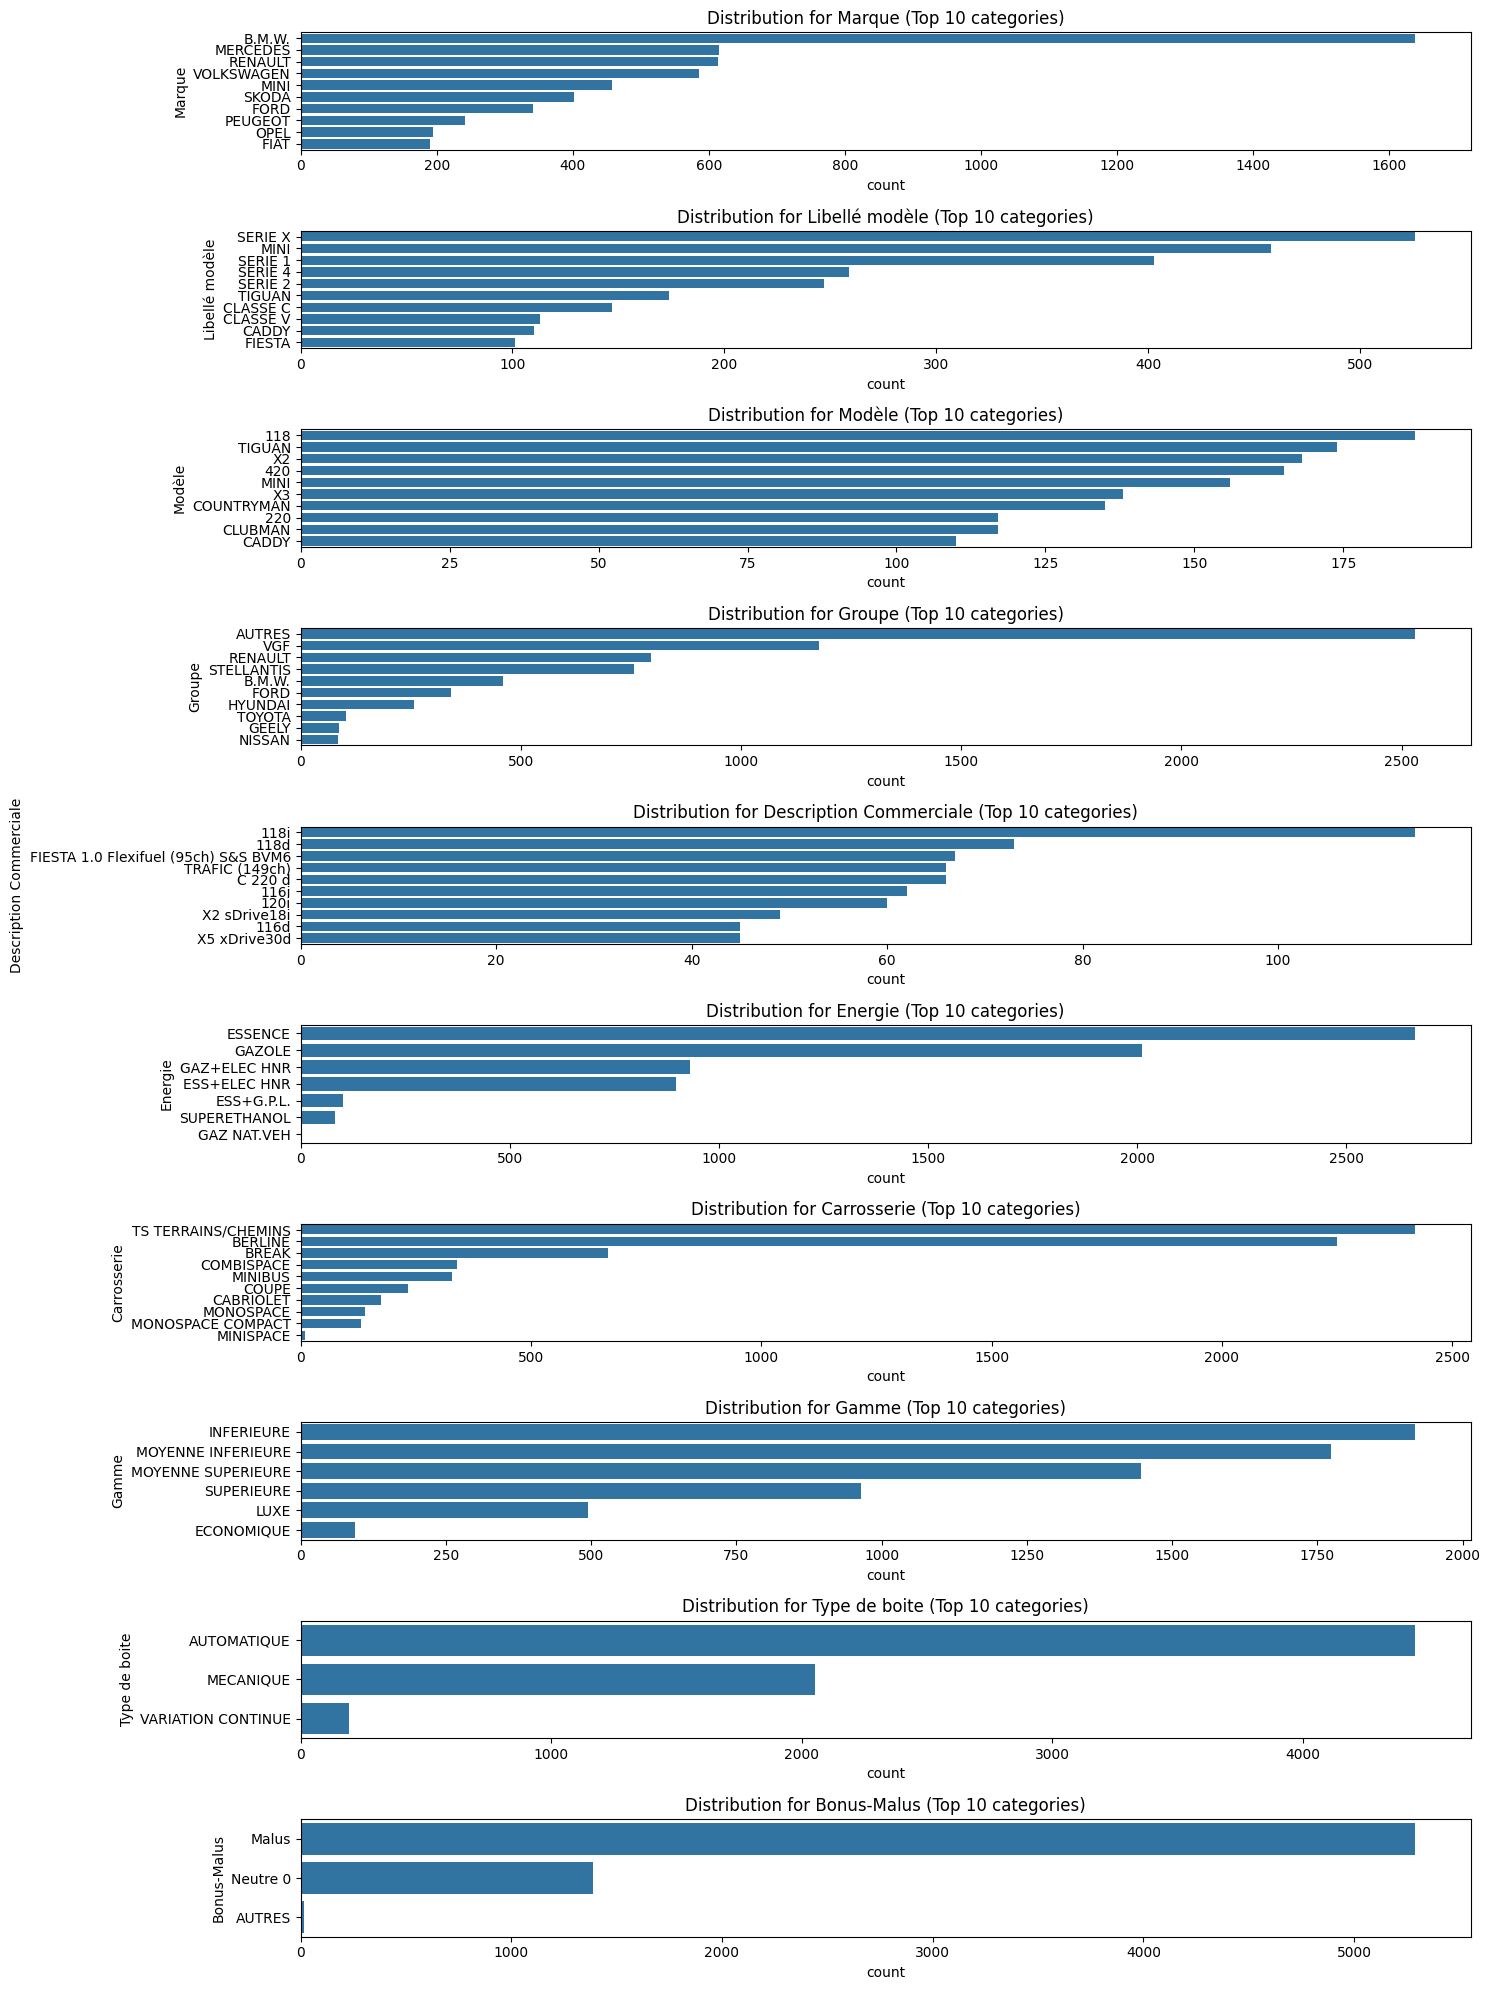

In [44]:
#Distribution selon les catégories intéressantes

import matplotlib.pyplot as plt
import seaborn as sns

numeric_stats = data.describe().transpose()
categorical_columns = data.select_dtypes(include='object').columns

print(categorical_columns)

# Define a function to plot bar plots for categorical columns with limitation on number of categories
def plot_limited_barplots(data, columns, max_categories=10):
    plt.figure(figsize=(15, 20))
    for i, column in enumerate(columns, 1):
        plt.subplot(len(columns), 1, i)
        
        # Get the top 'max_categories' categories based on frequency
        top_categories = data[column].value_counts().index[:max_categories]
        subset_data = data[data[column].isin(top_categories)]
        
        sns.countplot(y=subset_data[column], order=top_categories)
        plt.title(f'Distribution for {column} (Top {max_categories} categories)')
        plt.tight_layout()

# Display bar plots for the first few categorical columns
plot_limited_barplots(data, categorical_columns)  # Displaying first 5 columns for illustration

